## Downloading required packages and dataset

In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer # importing the Breast Cancer dataset

## Exploring the dataset

In [3]:
breast = load_breast_cancer() #load the breast cancer data into the breast variable
breast_data = breast.data     #get the data from the dataset object
print('breast_data.shape', breast_data.shape)     #display the shape of the data, where the samples and dimensionalty are (569, 30)
breast_labels = breast.target                     #get the labels (i.e., classifications) from the dataset object
print('breast_labels.shape', breast_labels.shape)  #checks the labels 
labels = np.reshape(breast_labels,(569,1))     #reshapes the label array to be a single column array for ease of use
final_breast_data = np.concatenate([breast_data,labels],axis=1)    #combines the features and labels together, resulting in a shape that us (569,31)
print('final_breast_data.shape', final_breast_data.shape)          

breast_dataset = pd.DataFrame(final_breast_data)     #converts the numpy array to a pandas dataframe for easier manipulation
features = breast.feature_names                     #get feature names and store them in features variable
print("features",features) 
features_labels = np.append(features,'label')        #add 'label' to the list of features, appending the "label" string to the "features" array, the resulting "features_labels" array now includes a label for each feature in the original array.
breast_dataset.columns = features_labels           #set the column names to be the same as the feature names
breast_dataset.head()                             #show first five rows of the dataframe
breast_dataset['label'].replace(0, 'Benign',inplace=True)    #change label 0 to Bening for readability
breast_dataset['label'].replace(1, 'Malignant',inplace=True) #change label 1 to Malignent
breast_dataset.tail()                               #show last 5 rows of the dataframe

#Normalization

x = breast_dataset.loc[:, features].values         #selects a subset of columns from the breast_dataset DataFrame using the loc method and assigns it to the variable x.
x = StandardScaler().fit_transform(x)              #normalizing the features

#If we check the shape of x we will see that it is (569, 30)
#If we check the standard deviation and mean if X, we can see that mean=-6.826538293184326e-17, and standard deviation = 1.0    

feat_cols = ['feature'+str(i) for i in range(x.shape[1])]    #creating a list of feature column names
normalised_breast = pd.DataFrame(x,columns=feat_cols)    #create a new DataFrame with normalized features only using standard scaler
normalised_breast.tail()                              #shows the last 5 rows


breast_data.shape (569, 30)
breast_labels.shape (569,)
final_breast_data.shape (569, 31)
features ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,...,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


## 1.2 Speeding Up ML Algorithm for BreastCancer Dataset

## 2.1. Testing different number of components

### Case 1: Number of components will be set to 2

<Figure size 640x480 with 0 Axes>

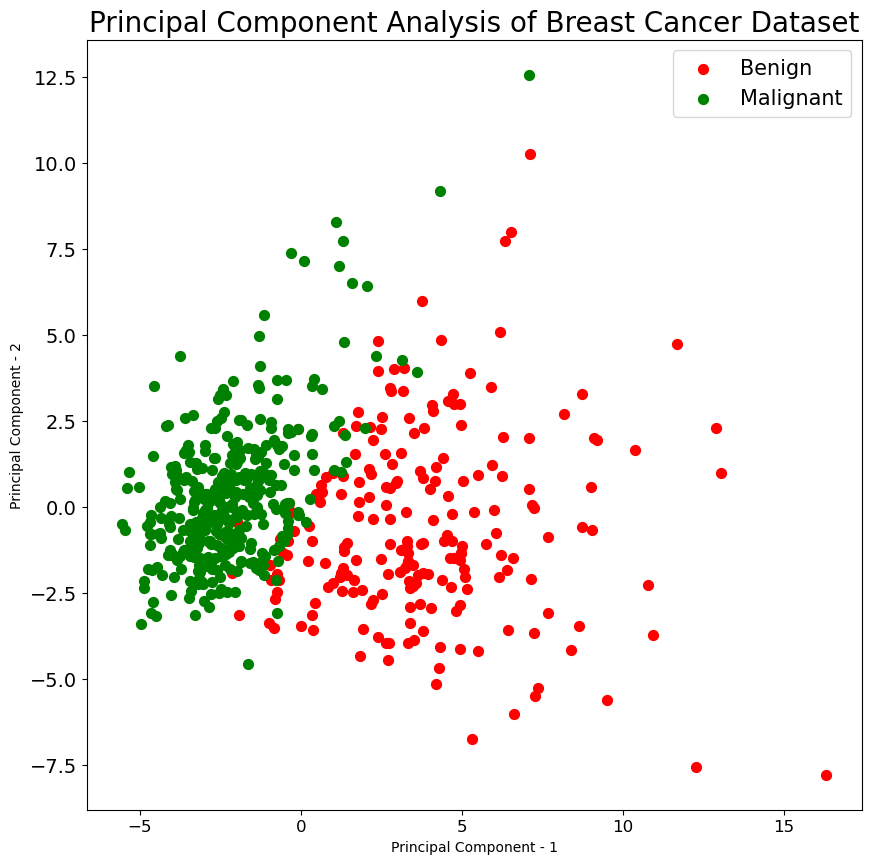

In [4]:
pca_breast = PCA(n_components=2) #creates an instance of the PCA class with the parameter n_components set to 2, indicating that we want to reduce the dimensionality of the data to 2 principal components.

principalComponents_breast = pca_breast.fit_transform(x) 
principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['principal component 1', 'principal component 2']) 
principal_breast_Df.tail()
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1', fontsize=10)
plt.ylabel('Principal Component - 2', fontsize=10)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})


### Case 2: Number of components will be set to 3

<Figure size 640x480 with 0 Axes>

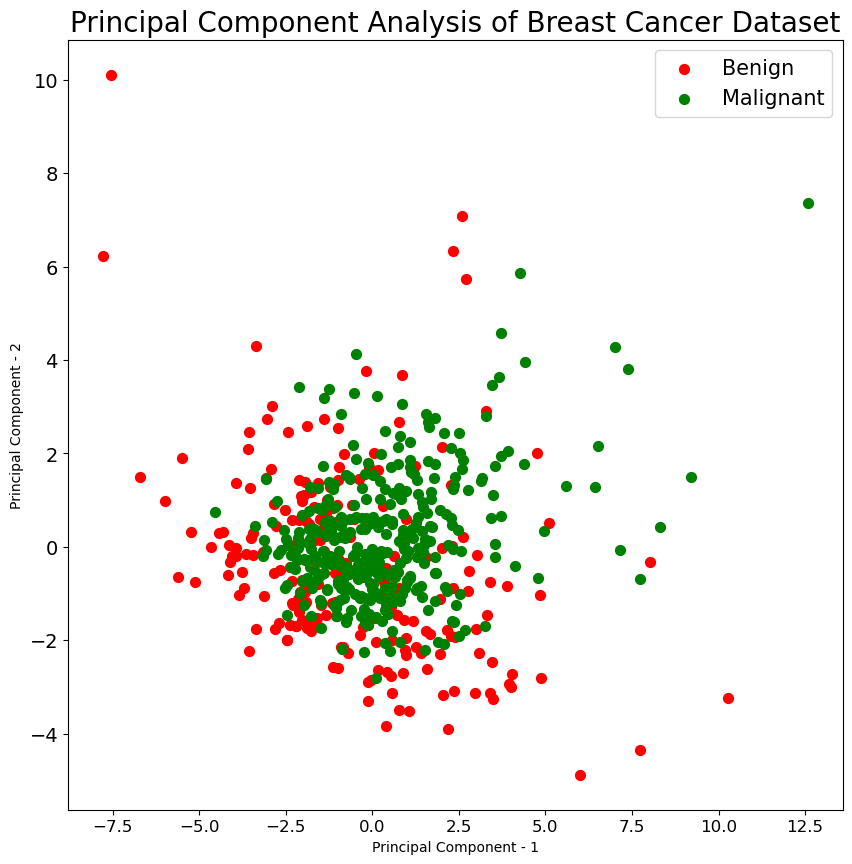

In [5]:
pca_breast = PCA(n_components=3)
principalComponents_breast = pca_breast.fit_transform(x)
principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principal_breast_Df.tail()
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1', fontsize=10)
plt.ylabel('Principal Component - 2', fontsize=10)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 2']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 3'],
                 c = color, s = 50)

plt.legend(targets,prop={'size': 15})


### Case 3: Number of components will be set to 4

<Figure size 640x480 with 0 Axes>

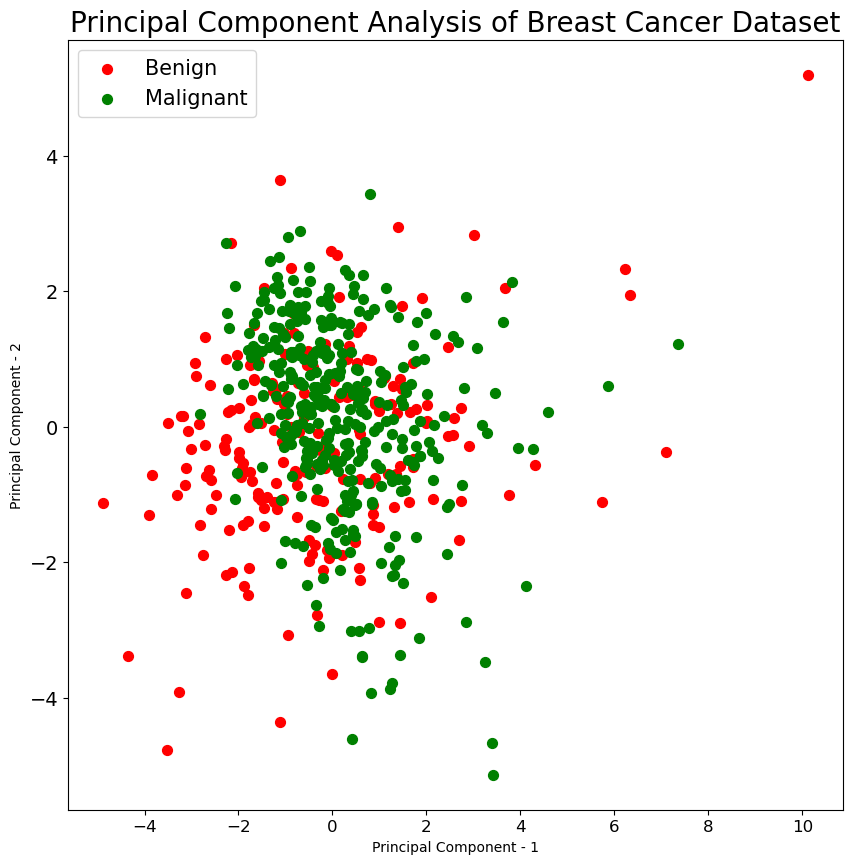

In [6]:
pca_breast = PCA(n_components=4)
principalComponents_breast = pca_breast.fit_transform(x)
principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['principal component 1', 'principal component 2', 'principal component 3','principal component 4'])
principal_breast_Df.tail()
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1', fontsize=10)
plt.ylabel('Principal Component - 2', fontsize=10)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 3'],
                 principal_breast_Df.loc[indicesToKeep, 'principal component 4'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})


### Case 4: Number of components will be set to 5

<Figure size 640x480 with 0 Axes>

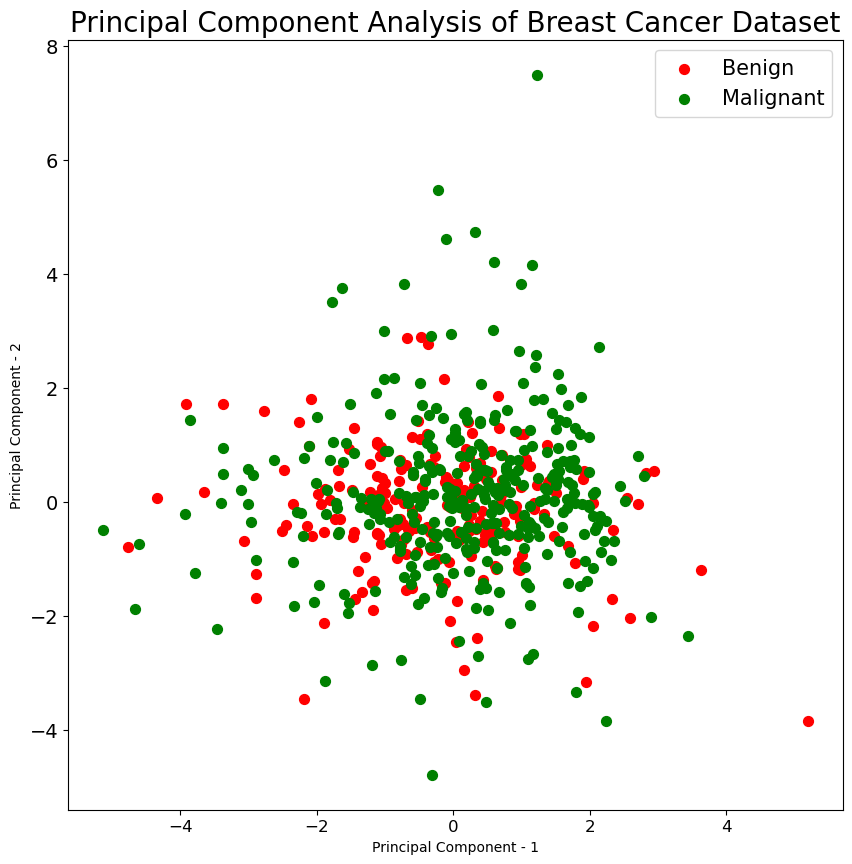

In [7]:
pca_breast = PCA(n_components=5)
principalComponents_breast = pca_breast.fit_transform(x)
principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['principal component 1', 'principal component 2', 'principal component 3','principal component 4', 'principal component 5'])
principal_breast_Df.tail()
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1', fontsize=10)
plt.ylabel('Principal Component - 2', fontsize=10)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 4'],
                 principal_breast_Df.loc[indicesToKeep, 'principal component 5'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})


### Diplaying ```explained_variance_ratio``` using a bar chart

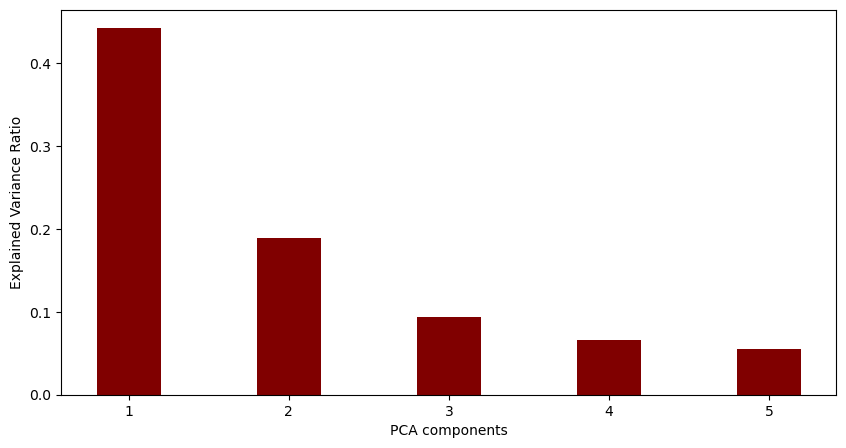

([<matplotlib.axis.XTick at 0x24c552f4400>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5')])

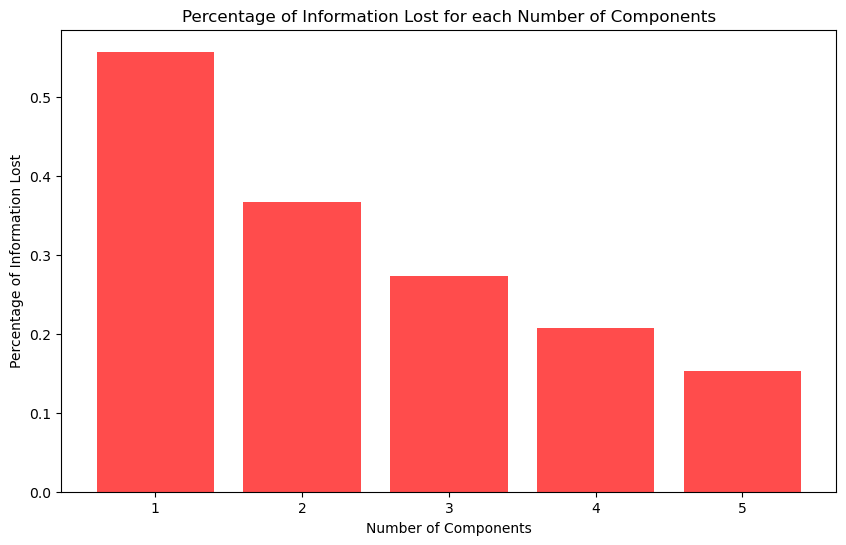

In [12]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(list(range(1, pca_breast.n_components_+1)), pca_breast.explained_variance_ratio_, color ='maroon', 
        width = 0.4)

plt.xlabel("PCA components")
plt.ylabel("Explained Variance Ratio")
plt.show()


# Plot the percentage of information lost
plt.figure(figsize=(10, 6))
plt.bar(range(1, pca_breast.n_components_ + 1), 1 - np.cumsum(pca_breast.explained_variance_ratio_), color='red', alpha=0.7)
plt.xlabel('Number of Components')
plt.ylabel('Percentage of Information Lost')
plt.title('Percentage of Information Lost for each Number of Components')
plt.xticks(range(1, pca_breast.n_components_ + 1))


## 2.2. Speeding Up ML for diffent variance ratios

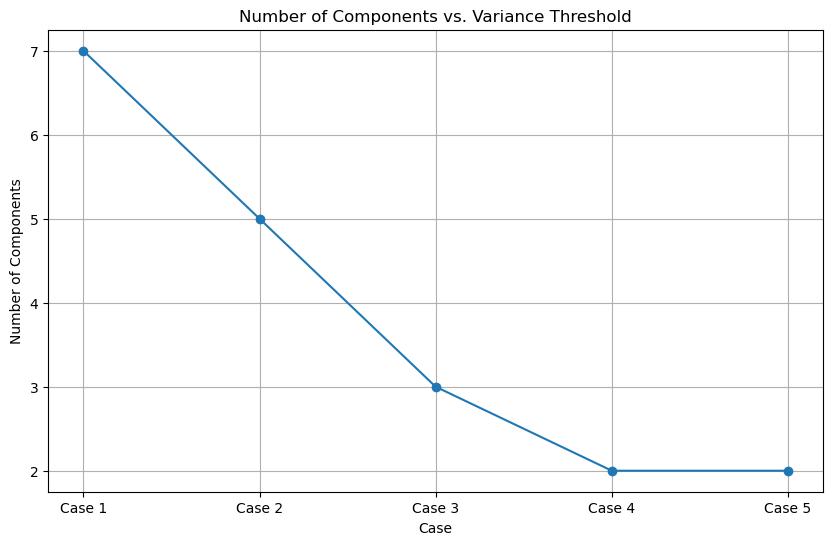

In [15]:
# Variance thresholds for each case
variance_thresholds = [0.90, 0.80, 0.70, 0.60, 0.50]
num_components = []

# Iterate over the variance thresholds
for threshold in variance_thresholds:
  pca = PCA(threshold)
  pca.fit(normalised_breast.iloc[:,:-1])
  PCA(copy=True, iterated_power='auto', n_components=threshold, random_state=None, svd_solver='auto', tol=0.0, whiten=False)
  num_components.append(pca.n_components_)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(variance_thresholds) + 1), num_components, marker='o', linestyle='-')
plt.xlabel('Case')
plt.ylabel('Number of Components')
plt.title('Number of Components vs. Variance Threshold')
plt.xticks(range(1, len(variance_thresholds) + 1), ['Case 1', 'Case 2', 'Case 3', 'Case 4', 'Case 5'])
plt.grid(True)
plt.show()


In [22]:
X = breast.data
y = breast.target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert labels to categorical
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)


#### 90% Variance

In [23]:

# Perform PCA
pca = PCA(0.9)  # Retain 90% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Define the neural network model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_pca.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Output layer with softmax activation for binary classification

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pca, y_train_categorical,
                    epochs=20,
                    batch_size=128,
                    validation_data=(X_test_pca, y_test_categorical))

Epoch 1/20


C:\Users\OKass\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.7671 - loss: 0.5230 - val_accuracy: 0.9649 - val_loss: 0.2721
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9389 - loss: 0.2664 - val_accuracy: 0.9649 - val_loss: 0.1927
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9561 - loss: 0.1999 - val_accuracy: 0.9649 - val_loss: 0.1510
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9627 - loss: 0.1570 - val_accuracy: 0.9737 - val_loss: 0.1264
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9704 - loss: 0.1312 - val_accuracy: 0.9737 - val_loss: 0.1107
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9733 - loss: 0.1245 - val_accuracy: 0.9737 - val_loss: 0.0971
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9739 - loss: 0.1058 - val_accuracy: 0.9737 - val_loss: 0.0904
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9711 - loss: 0.1017 - val_accuracy: 0.9737 - val_loss: 0.0844
Epoch 9/20
4/4 ━━

#### 80% Variance

In [24]:

# Perform PCA
pca = PCA(0.8)  # Retain 80% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Define the neural network model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_pca.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Output layer with softmax activation for binary classification

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pca, y_train_categorical,
                    epochs=20,
                    batch_size=128,
                    validation_data=(X_test_pca, y_test_categorical))

Epoch 1/20


C:\Users\OKass\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.4995 - loss: 0.7366 - val_accuracy: 0.9298 - val_loss: 0.3826
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9428 - loss: 0.3526 - val_accuracy: 0.9649 - val_loss: 0.2522
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9566 - loss: 0.2482 - val_accuracy: 0.9649 - val_loss: 0.1909
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9589 - loss: 0.1891 - val_accuracy: 0.9649 - val_loss: 0.1532
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9600 - loss: 0.1596 - val_accuracy: 0.9737 - val_loss: 0.1293
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9670 - loss: 0.1442 - val_accuracy: 0.9737 - val_loss: 0.1142
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9710 - loss: 0.1132 - val_accuracy: 0.9737 - val_loss: 0.1033
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9765 - loss: 0.1015 - val_accuracy: 0.9737 - val_loss: 0.0946
Epoch 9/20
4/4 ━

#### 70% Variance

In [25]:

# Perform PCA
pca = PCA(0.7)  # Retain 70% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Define the neural network model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_pca.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Output layer with softmax activation for binary classification

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pca, y_train_categorical,
                    epochs=20,
                    batch_size=128,
                    validation_data=(X_test_pca, y_test_categorical))

Epoch 1/20


C:\Users\OKass\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.3982 - loss: 0.8194 - val_accuracy: 0.9737 - val_loss: 0.3845
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9526 - loss: 0.3601 - val_accuracy: 0.9649 - val_loss: 0.2506
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9456 - loss: 0.2525 - val_accuracy: 0.9649 - val_loss: 0.1902
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9436 - loss: 0.2036 - val_accuracy: 0.9649 - val_loss: 0.1550
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9439 - loss: 0.1726 - val_accuracy: 0.9737 - val_loss: 0.1325
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9551 - loss: 0.1523 - val_accuracy: 0.9737 - val_loss: 0.1176
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9418 - loss: 0.1548 - val_accuracy: 0.9825 - val_loss: 0.1051
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9501 - loss: 0.1354 - val_accuracy: 0.9825 - val_loss: 0.0939
Epoch 9/20
4/4 ━━

#### 60% Variance

In [26]:

# Perform PCA
pca = PCA(0.6)  # Retain 60% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Define the neural network model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_pca.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Output layer with softmax activation for binary classification

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pca, y_train_categorical,
                    epochs=20,
                    batch_size=128,
                    validation_data=(X_test_pca, y_test_categorical))

Epoch 1/20


C:\Users\OKass\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.4746 - loss: 0.7553 - val_accuracy: 0.9737 - val_loss: 0.3905
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9216 - loss: 0.3794 - val_accuracy: 0.9825 - val_loss: 0.2676
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9348 - loss: 0.2794 - val_accuracy: 0.9825 - val_loss: 0.2070
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9405 - loss: 0.2291 - val_accuracy: 0.9825 - val_loss: 0.1673
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9369 - loss: 0.1990 - val_accuracy: 0.9825 - val_loss: 0.1388
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9465 - loss: 0.1721 - val_accuracy: 0.9825 - val_loss: 0.1217
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9406 - loss: 0.1672 - val_accuracy: 0.9825 - val_loss: 0.1081
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9414 - loss: 0.1560 - val_accuracy: 0.9912 - val_loss: 0.0960
Epoch 9/20
4/4 ━━

#### 50% Variance

In [27]:

# Perform PCA
pca = PCA(0.5)  # Retain 50% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Define the neural network model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_pca.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Output layer with softmax activation for binary classification

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pca, y_train_categorical,
                    epochs=20,
                    batch_size=128,
                    validation_data=(X_test_pca, y_test_categorical))

Epoch 1/20


C:\Users\OKass\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9154 - loss: 0.4620 - val_accuracy: 0.9912 - val_loss: 0.2491
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9620 - loss: 0.2519 - val_accuracy: 0.9912 - val_loss: 0.1785
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9390 - loss: 0.2152 - val_accuracy: 0.9912 - val_loss: 0.1410
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9517 - loss: 0.1729 - val_accuracy: 0.9912 - val_loss: 0.1168
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9405 - loss: 0.1661 - val_accuracy: 0.9912 - val_loss: 0.0991
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9373 - loss: 0.1537 - val_accuracy: 0.9912 - val_loss: 0.0900
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9485 - loss: 0.1479 - val_accuracy: 0.9912 - val_loss: 0.0812
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9391 - loss: 0.1572 - val_accuracy: 0.9912 - val_loss: 0.0752
Epoch 9/20
4/4 ━━